<a href="https://colab.research.google.com/github/Osmym79/colab_test/blob/main/1_class_YOLO_8_NANO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="oyfEAB3BmgPRrM34J5Xh")
project = rf.workspace("shwet").project("sl_techno_part2")
version = project.version(1)
dataset = version.download("yolov8")


/content/drive/MyDrive/Dental/Shared/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sl_techno_part2-1 in yolov8:: 100%|██████████| 4086/4086 [00:44<00:00, 91.98it/s]


In [ ]:
HOME = "/content/drive/MyDrive/Dental/Shared"

In [ ]:
%cd {HOME}

# !yolo train model=yolov8n.pt data={dataset.location}/data.yaml epochs=150 imgsz=640 project="/content/drive/MyDrive/Dental/1_class_yolo8_n" batch=0.9
!yolo task=segment mode=train model="/content/drive/MyDrive/Dental/Shared/train2/weights/last.pt" data={dataset.location}/data.yaml epochs=150 imgsz=640 project="/content/drive/MyDrive/Dental/Shared" batch=0.7 resume

/content/drive/MyDrive/Dental/Shared
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
New https://pypi.org/project/ultralytics/8.3.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Dental/Shared/train2/weights/last.pt, data=/content/{HOME}/datasets/sl_techno_part2-1/data.yaml, epochs=150, time=None, patience=100, batch=0.7, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=/content/drive/MyDrive/Dental/1_class_yolo8_n, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/Dental/Shared/train2/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, mul

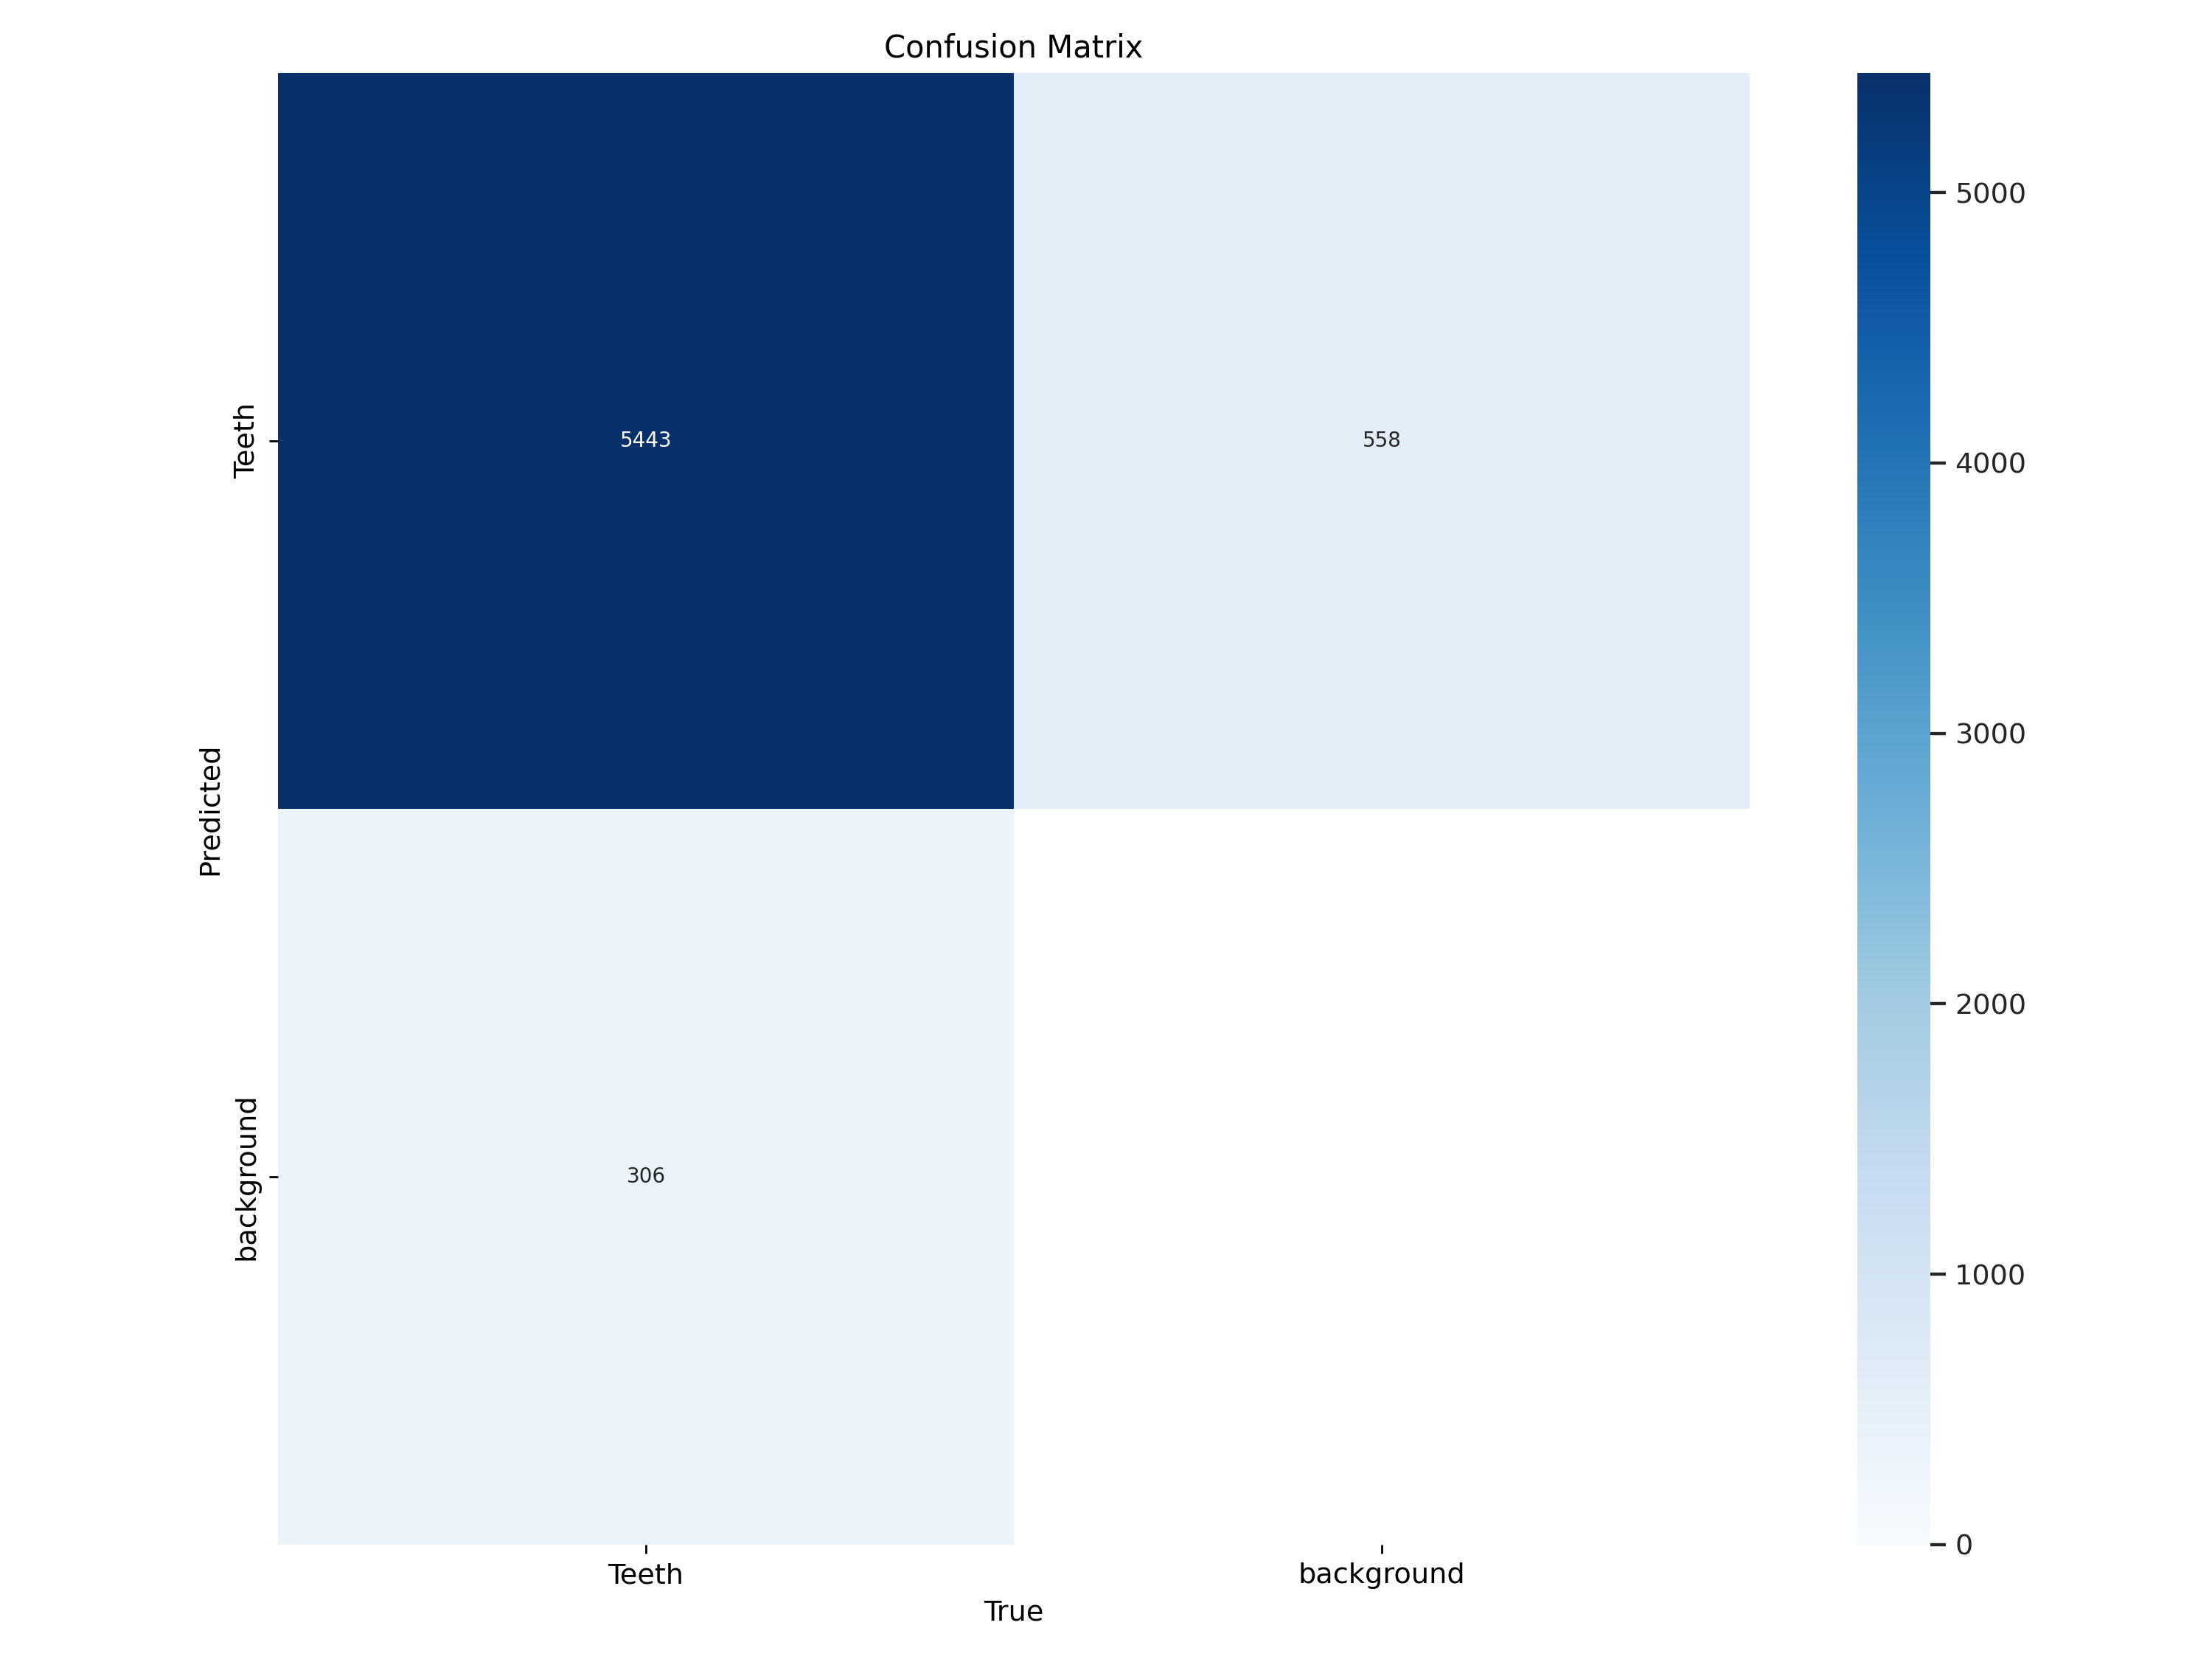

In [ ]:

Image(filename=f'/content/drive/MyDrive/Dental/1_class_yolo8_n/train2/confusion_matrix.png', width=600)

/content/drive/MyDrive/Dental/Shared


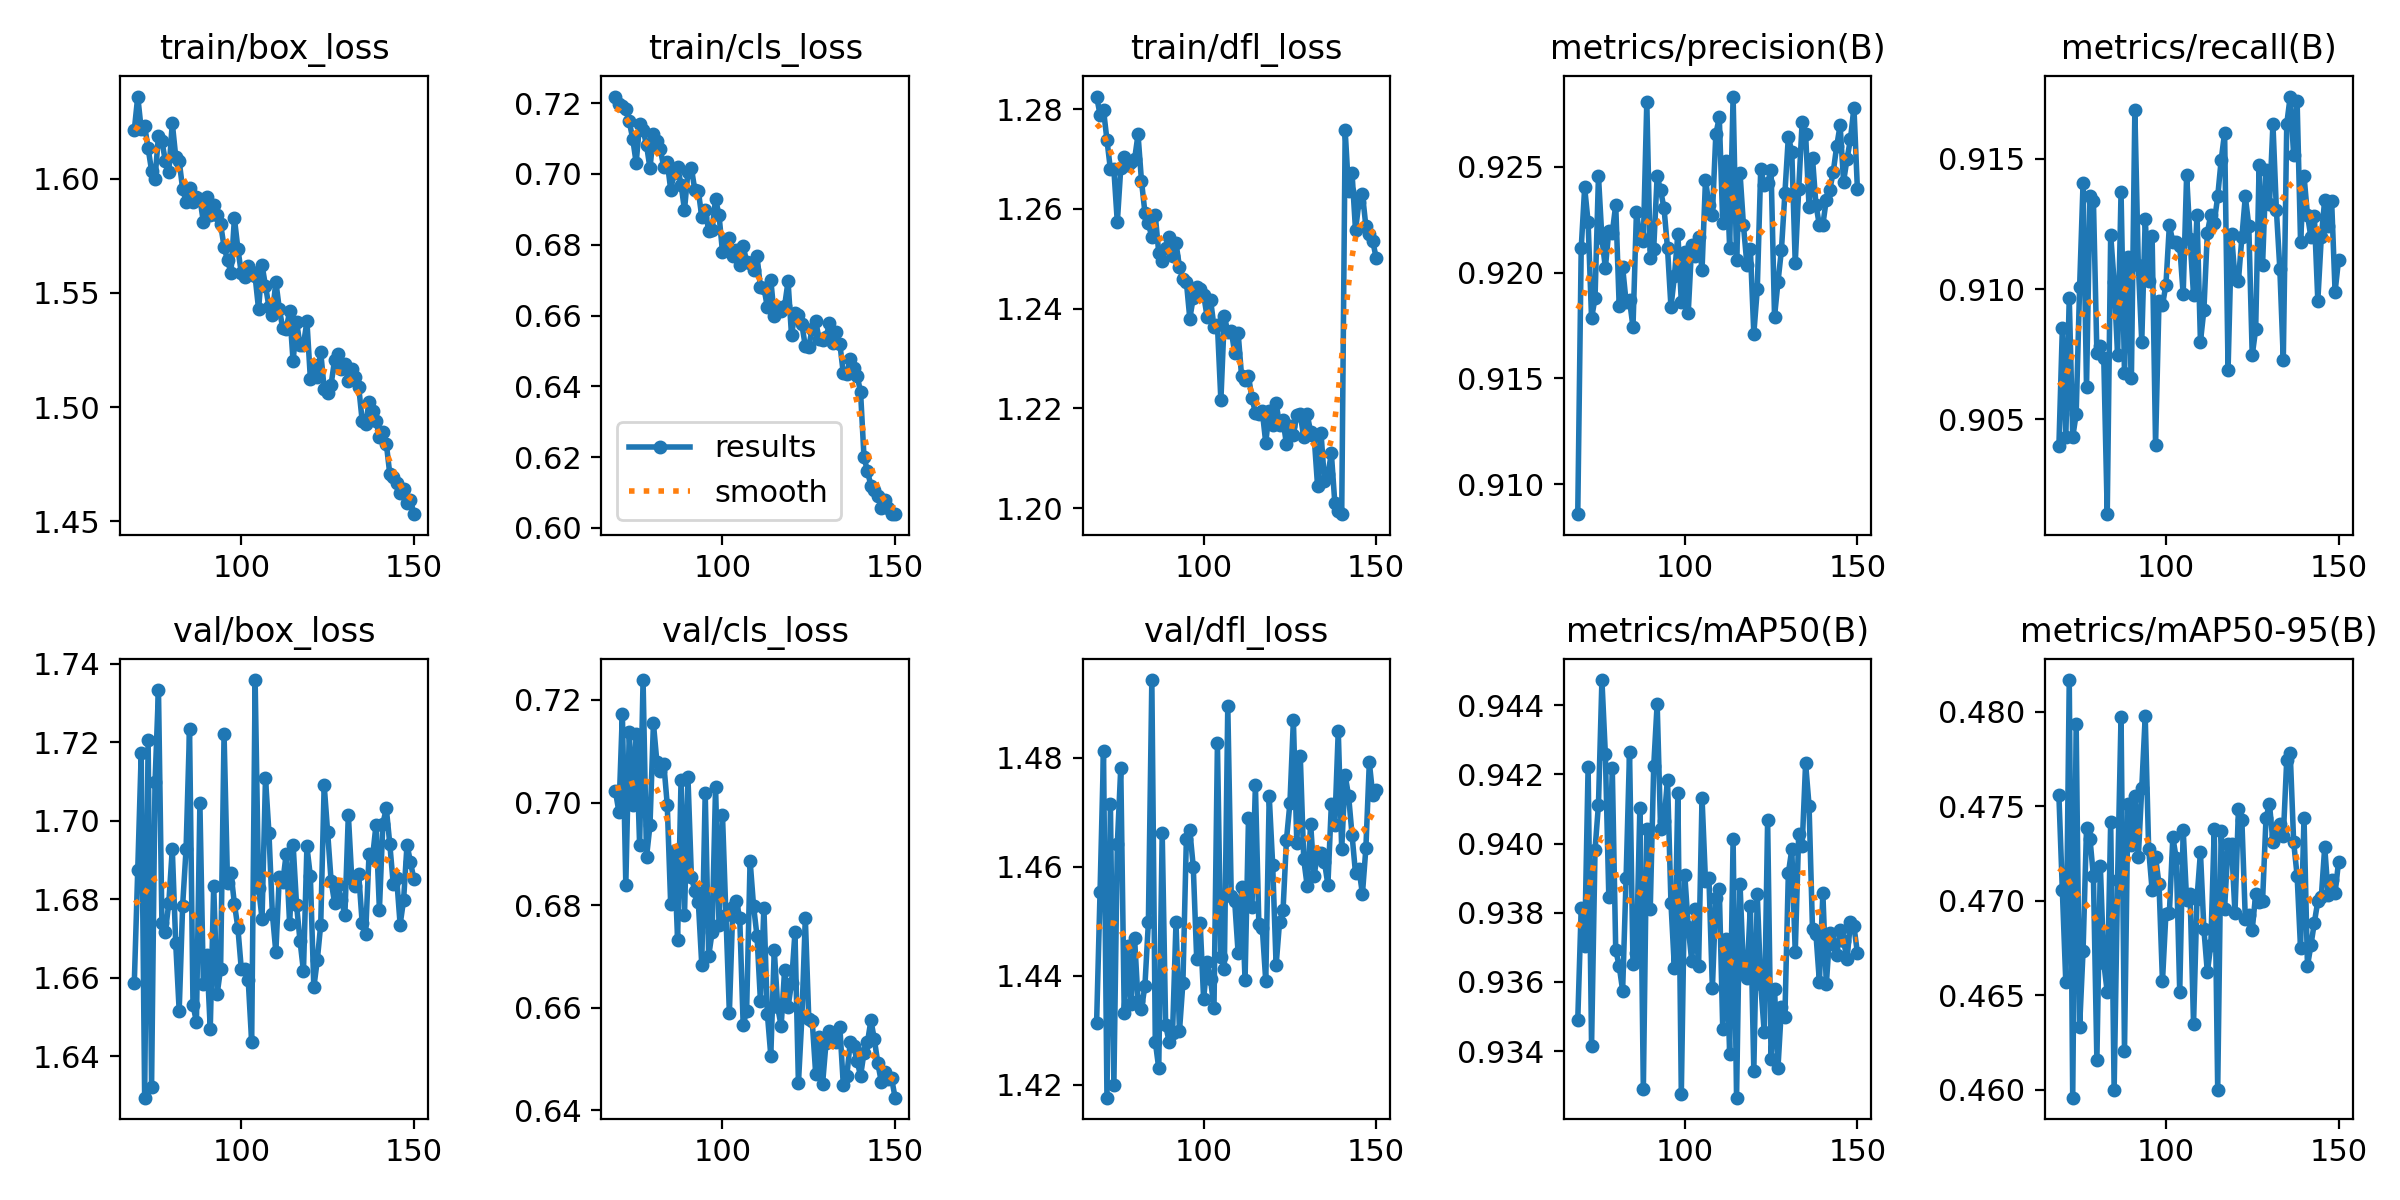

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Dental/1_class_yolo8_n/train2/results.png', width=600)

/content/drive/MyDrive/Dental/Shared


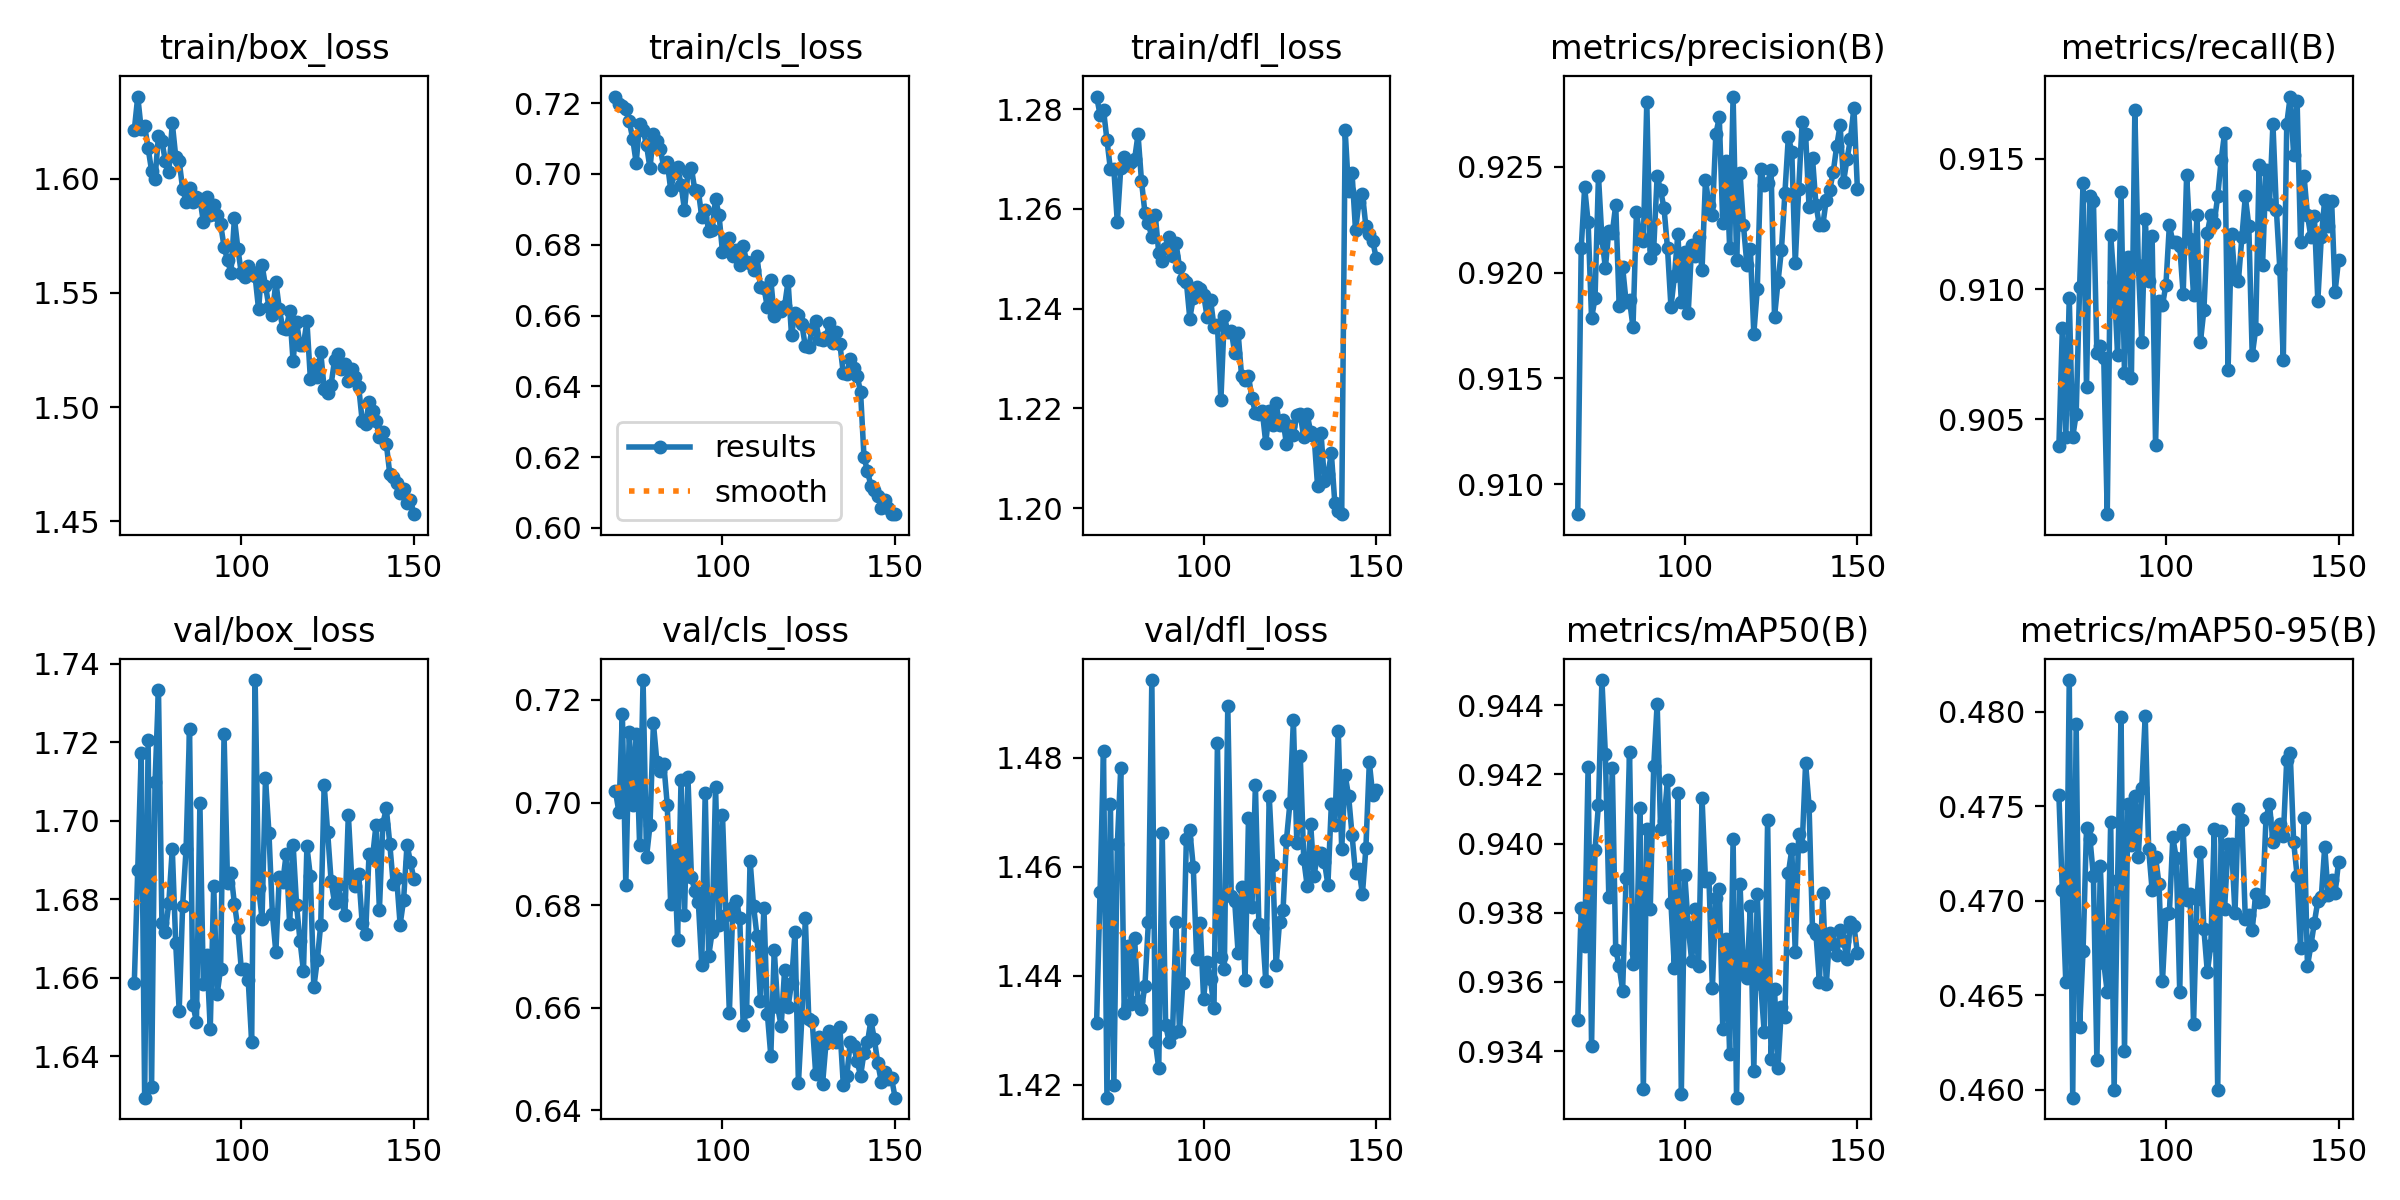

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Dental/1_class_yolo8_n/train2/results.png', width=600)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model='/content/drive/MyDrive/Dental/1_class_yolo8_n/train2/weights/best.pt' data={dataset.location}/data.yaml

/content/drive/MyDrive/Dental/Shared
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 831, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 636, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py", line 142, in __call__
    se

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model='/content/drive/MyDrive/Dental/1_class_yolo8_n/train2/weights/best.pt' conf=0.25 source={dataset.location}/test/images save=true

/content/drive/MyDrive/Dental/Shared
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/200 /content/drive/MyDrive/Dental/Shared/datasets/sl_techno_part2-1/test/images/101_png_jpg.rf.01c9beaec11d7306fbe1c9193f356d2c.jpg: 640x640 29 Teeths, 795.7ms
image 2/200 /content/drive/MyDrive/Dental/Shared/datasets/sl_techno_part2-1/test/images/102_jpg.rf.a403ed86fe03efc8f5a49849b363ddab.jpg: 640x640 32 Teeths, 388.7ms
image 3/200 /content/drive/MyDrive/Dental/Shared/datasets/sl_techno_part2-1/test/images/106_png_jpg.rf.e0d6243bee7c5a052c9db270ab1fb278.jpg: 640x640 30 Teeths, 600.5ms
image 4/200 /content/drive/MyDrive/Dental/Shared/datasets/sl_techno_part2-1/test/images/108_jpg.rf.d96e9b43ed2d8ec77b95247d991dd80d.jpg: 640x640 29 Teeths,